# DIY Covid-19 Dashboard

In [2]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

In [3]:
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

In [4]:
# Load JSON files and store the raw data in some variable. Edit as appropriate
from uk_covid19 import Cov19API
import json

AREA_TYPE = "nation"
AREA_NAME = "scotland"

filters = [
   f"areaType={ AREA_TYPE }",
   f"areaName={ AREA_NAME }"
]

structure = { "date":"date","areaName":"areaName","areaCode":"areaCode","newCasesByPublishDate": "newCasesByPublishDate",
"newDeaths28DaysByPublishDate": "newDeaths28DaysByPublishDate" }

api = Cov19API(filters=filters, structure=structure)

newdeaths_newinfections_scotland=api.get_json()

print(newdeaths_newinfections_scotland)


import json

with open("newdeaths_newinfections_scotland", "wt") as OUTF:
    json.dump(newdeaths_newinfections_scotland, OUTF)
    

{'data': [{'date': '2021-12-07', 'areaName': 'Scotland', 'areaCode': 'S92000003', 'newCasesByPublishDate': 3060, 'newDeaths28DaysByPublishDate': 12}, {'date': '2021-12-06', 'areaName': 'Scotland', 'areaCode': 'S92000003', 'newCasesByPublishDate': 3894, 'newDeaths28DaysByPublishDate': 0}, {'date': '2021-12-05', 'areaName': 'Scotland', 'areaCode': 'S92000003', 'newCasesByPublishDate': 2607, 'newDeaths28DaysByPublishDate': 1}, {'date': '2021-12-04', 'areaName': 'Scotland', 'areaCode': 'S92000003', 'newCasesByPublishDate': 1257, 'newDeaths28DaysByPublishDate': 14}, {'date': '2021-12-03', 'areaName': 'Scotland', 'areaCode': 'S92000003', 'newCasesByPublishDate': 2432, 'newDeaths28DaysByPublishDate': 16}, {'date': '2021-12-02', 'areaName': 'Scotland', 'areaCode': 'S92000003', 'newCasesByPublishDate': 3002, 'newDeaths28DaysByPublishDate': 27}, {'date': '2021-12-01', 'areaName': 'Scotland', 'areaCode': 'S92000003', 'newCasesByPublishDate': 2796, 'newDeaths28DaysByPublishDate': 19}, {'date': '20

## Graphs and Analysis

This showcases the new infections and new deaths in scotland, accurate to the past 28 days. This is also juxtaposed to a graph detailing the ages and sexes of infections.

2020-03-02 00:00:00  to  2021-12-07 00:00:00
['25_to_29', '30_to_34', '60_to_64', '50_to_54', '40_to_44', '55_to_59', '65_to_69', '5_to_9', '80_to_84', '20_to_24', '35_to_39', '85_to_89', '10_to_14', '90+', '15_to_19', '75_to_79', '0_to_4', '45_to_49', '70_to_74']
85
90
['0_to_4', '5_to_9', '10_to_14', '15_to_19', '20_to_24', '25_to_29', '30_to_34', '35_to_39', '40_to_44', '45_to_49', '50_to_54', '55_to_59', '60_to_64', '65_to_69', '70_to_74', '75_to_79', '80_to_84', '85_to_89', '90+']


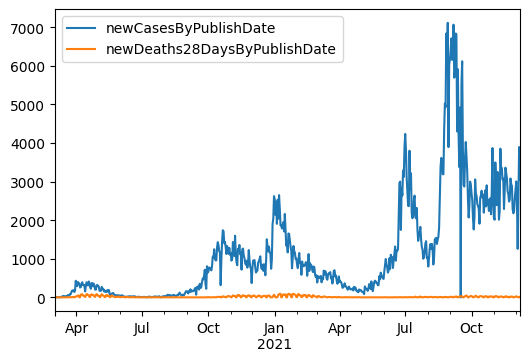

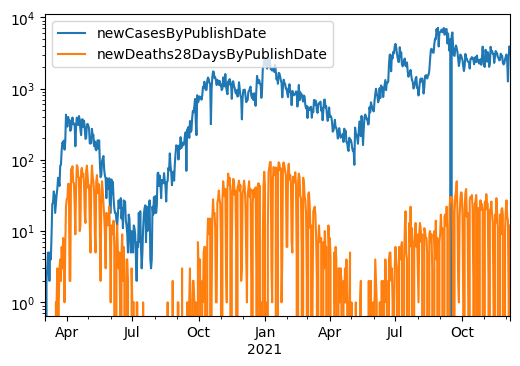

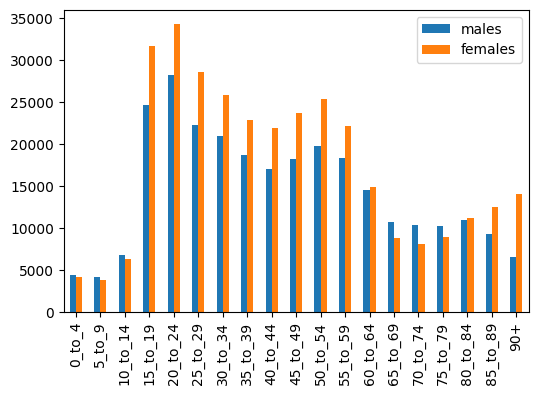

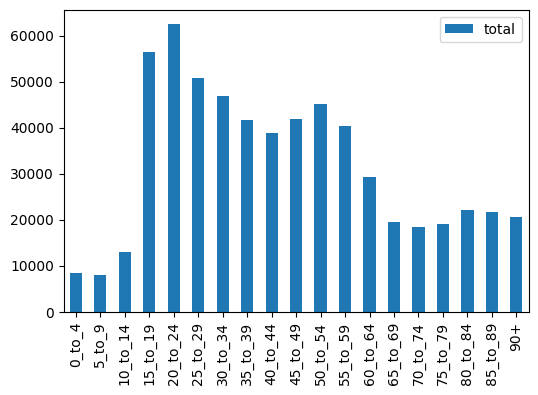

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import json

%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100







with open("newdeaths_newinfections_scotland", "rt") as INFILE:
    data=json.load(INFILE)
    

datalist=data['data']
datalist

dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()
dates

def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
print (startdate, ' to ', enddate)

index=pd.date_range(startdate, enddate, freq='D')
newdeaths_newinfectionsdf=pd.DataFrame(index=index, columns=['newCasesByPublishDate', 'newDeaths28DaysByPublishDate'])
newdeaths_newinfectionsdf

for entry in datalist: # each entry is a dictionary with date, cases, hospital and deaths
    date=parse_date(entry['date'])
    for column in ['newCasesByPublishDate','newDeaths28DaysByPublishDate']:
        # check that nothing is there yet - just in case some dates are duplicated,
        # maybe with data for different columns in each entry
        if pd.isna(newdeaths_newinfectionsdf.loc[date, column]): 
            # replace None with 0 in our data 
            value= float(entry[column]) if entry[column]!=None else 0.0
            # this is the way you access a specific location in the dataframe - use .loc
            # and put index,column in a single set of [ ]
            newdeaths_newinfectionsdf.loc[date, column]=value
            
# fill in any remaining "holes" due to missing dates
newdeaths_newinfectionsdf.fillna(0.0, inplace=True)
            
newdeaths_newinfectionsdf

newdeaths_newinfectionsdf.plot()

newdeaths_newinfectionsdf.plot(logy=True)

with open("agedistribution.json", "rt") as INFILE:
    data=json.load(INFILE)
    
datadic=data['data'][0] # data['data'] is a list
datadic

males=datadic['males']
females=datadic['females']
males

ageranges=[x['age'] for x in males] # each entry of males is a dictionary
print(ageranges)

def min_age(agerange):
    agerange=agerange.replace('+','') # remove the + from 90+
    start=agerange.split('_')[0]
    return int(start)

print(min_age('85_to_89'))
print(min_age('90+'))

ageranges.sort(key=min_age)
print (ageranges)

age_df=pd.DataFrame(index=ageranges, columns=['males','females', 'total'])

for entry in males: # each entry is a dictionary
    ageband=entry['age'] # our index position
    age_df.loc[ageband, 'males']=entry['value']
    
for entry in females:
    ageband=entry['age']
    age_df.loc[ageband, 'females']=entry['value']
    
# this is straightforward
age_df['total']=age_df['males']+age_df['females']

age_df.plot(kind='bar', y=['males','females'])

age_df.plot(kind='bar', y='total')

newdeaths_newinfectionsdf.to_pickle("newdeaths_newinfectionsdf.pkl")
age_df.to_pickle("agedf.pkl")

In [12]:
# Place your API access code in this function. Do not call this function directly; it will be called by 
# the button callback. 
def access_api(button):
    # Ignore the button parameter
    #
    # put code for polling the API here
    #
    # after all is done, you can switch the icon on the button to a "check" sign
    # and optionally disable the button - it won't be needed again.
    apibutton.icon="check"
    apibutton.disabled=True

# see the doc for the parameters    
apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to download current Public Health England data',
    icon='download' # (FontAwesome names without the `fa-` prefix)
)

# register the callback function with the button
apibutton.on_click(access_api)

# this is an iPython function that generalises print for Jupyter Notebooks; we use it to 
# display the widgets
display(apibutton)

Button(description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Click to download current Pu…

In [14]:
# Printout from this function will be lost in Voila unless captured in an
# output widget - therefore, we give feedback to the user by changing the 
# appearance of the button
def api_button_callback(button):
    """ Button callback - it must take the button as its parameter (unused in this case).
    Accesses API, wrangles data, updates global variable df used for plotting. """
    # Get fresh data from the API. If you have time, include some error handling
    # around this call.
    apidata=access_api()
    # wrangle the data and overwrite the dataframe for plotting
    global df
    df=wrangle_data(apidata)
    # the graph won't refresh until the user interacts with the widget.
    # this function simulates the interaction, see Graph and Analysis below.
    # you can omit this step in the first instance
    refresh_graph()
    # after all is done, you can switch the icon on the button to a "check" sign
    # and optionally disable the button - it won't be needed again. You can use icons
    # "unlink" or "times" and change the button text to "Unavailable" in case the 
    # api call fails.
    apibutton.icon="check"
    # apibutton.disabled=True

    
apibutton=wdg.Button(
    description='WRONG', # you may want to change this...
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip="Keep calm and carry on",
    # FontAwesome names without the `fa-` prefix - try "download"
    icon='exclamation-triangle'
)

# remember to register your button callback function with the button
apibutton.on_click(api_button_callback) # the name of your function inside these brackets

display(apibutton)

# run all cells before clicking on this button

Button(button_style='danger', description='WRONG', icon='exclamation-triangle', style=ButtonStyle(), tooltip='…

## Graphs and Analysis

This is an interactive graph detailing the newdeaths vs the new infections in Scotland, which can be adjusted logarithmically and linearly. Furthermore, it contrasts it with a graph detailing the ages and sexes of the cases.

In [11]:


age_df=pd.read_pickle("agedf.pkl")

agecols=wdg.SelectMultiple(
    options=['males', 'females', 'total'], # options available
    value=['males', 'females'], # initial value
    rows=3, # rows of the selection box
    description='Sex',
    disabled=False
)

def age_graph(graphcolumns):
    # our callback function.
    ncols=len(graphcolumns)
    if ncols>0:
        age_df.plot(kind='bar', y=list(graphcolumns)) # graphcolumns is a tuple - we need a list
        plt.show() # important - graphs won't update properly if this is missing
    else:
        # if the user has not selected any column, print a message instead
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")
    
# keep calling age_graph(graphcolumns=value_of_agecols); capture output in widget output    
output=wdg.interactive_output(age_graph, {'graphcolumns': agecols})

display(agecols, output)

newdeaths_newinfectionsdf=pd.read_pickle("newdeaths_newinfectionsdf.pkl")

series=wdg.SelectMultiple(
    options=['newCasesByPublishDate', 'newDeaths28DaysByPublishDate'],
    value=['newCasesByPublishDate','newDeaths28DaysByPublishDate'],
    rows=3,
    description='Stats:',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Scale:',
    disabled=False
)

# try replacing HBox with a VBox
controls=wdg.HBox([series, scale])

def newdeaths_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        newdeaths_newinfectionsdf[list(gcols)].plot(logy=logscale)
        plt.show() # important - graphs won't update if this is missing 
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

# keep calling timeseries_graph(gcols=value_of_series, gscale=value_of_scale); 
# capture output in widget graph   
graph=wdg.interactive_output(newdeaths_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

# stack series and scale on top of each other
ctrls=wdg.VBox([series, scale])
# put the graph and the controls side by side
form=wdg.HBox([graph, ctrls])

# Now form contains the entire interface
display(form)

Button(description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Click to download current Pu…

SelectMultiple(description='Sex', index=(0, 1), options=('males', 'females', 'total'), rows=3, value=('males',…

Output()

Output()

## Deploying the dashboard

Once your code is ready and you are satisfied with the appearance of the graphs, replace all the text boxes above with the explanations you would like a dashboard user to see. The next step is deploying the dashboard online - there are several [options](https://voila.readthedocs.io/en/stable/deploy.html) for this, we suggest deploying as a [Binder](https://mybinder.org/). This is basically the same technique that has been used to package this tutorial and to deploy this template dashboard. The instructions may seem a bit involved, but the actual steps are surprisingly easy - we will be going through them together during a live session. You will need an account on [GitHub](https://github.com/) for this - if you don't have one already, now it's the time to create it. 

**Author and Copyright Notice** Remember if you deploy this dashboard as a Binder it will be publicly accessible. Take credit for your work! Also acknowledge the data source: *Based on UK Government [data](https://coronavirus.data.gov.uk/) published by [Public Health England](https://www.gov.uk/government/organisations/public-health-england).*